# Derivatives
---

In [1]:
import sympy as smp

**Q1:** Find the derivative of the followings:

1. $f(x) = x^2$
2. $y = e^{2x}$

In [2]:
x = smp.symbols('x', real=True)

f = x**2

In [3]:
dydx = smp.diff(f,x)
dydx

2*x

In [4]:
y = smp.exp(2*x)

dydx = smp.diff(y, x)
dydx

2*exp(2*x)

**Q2:** Find the derivative of $f(x) = e^{-asin(x^2)}.sin(b^x).ln(\dfrac {c sin^2(x)}{x})$

In [5]:
x, a, b, c = smp.symbols('x,a,b,c', real=True)

f = smp.exp(-a*smp.sin(x**2)) * smp.sin(b**x) * smp.log(c * smp.sin(x)**2 / x)

In [6]:
f

exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)

In [7]:
dfdx = smp.diff(f,x)
dfdx

-2*a*x*exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) + x*(2*c*sin(x)*cos(x)/x - c*sin(x)**2/x**2)*exp(-a*sin(x**2))*sin(b**x)/(c*sin(x)**2)

### Nth derivative

That is: $\dfrac{d^ny}{dx^n}$. Use `smp.diff(y,x,n)` where n is the nth term.

In [8]:
f

exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)

In [9]:
d4fdx4 = smp.diff(f,x,4)
#d4fdx4

**Substituting the value of the constant**

In [10]:
dfdx.subs([(x,4), (a,1), (b,2),(c,3)])

4*(-3*sin(4)**2/16 + 3*sin(4)*cos(4)/2)*exp(-sin(16))*sin(16)/(3*sin(4)**2) - 8*exp(-sin(16))*log(3*sin(4)**2/4)*sin(16)*cos(16) + 16*exp(-sin(16))*log(2)*log(3*sin(4)**2/4)*cos(16)

**To evaluate the substitutes**

In [11]:
dfdx.subs([(x,4), (a,1), (b,2),(c,3)]).evalf()

13.8869214780286

### Convert Numerical function to Plotting

In [12]:
dfdx_f = smp.lambdify((x,a,b,c), dfdx)

Define x and y arrays using the numerical function above

In [13]:
import numpy as np
import matplotlib.pyplot as plt

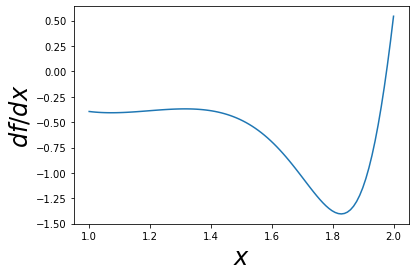

In [14]:
x = np.linspace(1,2,100)
y = dfdx_f(x, a=1, b=2, c=3)

plt.plot(x,y)
plt.ylabel('$df/dx$', fontsize=24)
plt.xlabel('$x$', fontsize=24);

# Numerical Case

You are given data like:

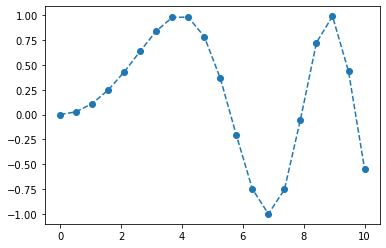

In [39]:
import numpy as np

x, y = np.loadtxt('sample_data.txt')
plt.plot(x,y,'o--');

In [40]:
# To find derivate across the point
dydx = np.gradient(y,x)

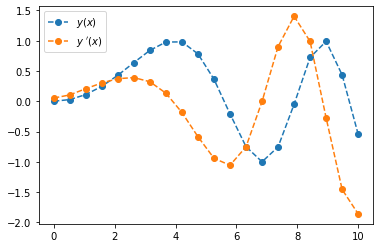

In [47]:
plt.plot(x,y, 'o--', label="$y(x)$")
plt.plot(x,dydx, 'o--', label="$y\ '(x)$")
plt.legend();

#### For noisy data

In [48]:
x, y = np.loadtxt('sample_data2.txt')
dydx = np.gradient(y,x)

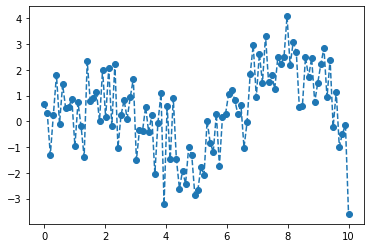

In [50]:
plt.plot(x,y, 'o--');

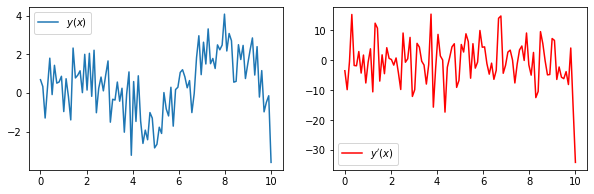

In [52]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(x,y, label="$y(x)$")
ax[1].plot(x,dydx, label="$y\'(x)$", color="r")
[a.legend() for a in ax]
plt.show();

#### Alternatively

Smooth data then take derivative. 

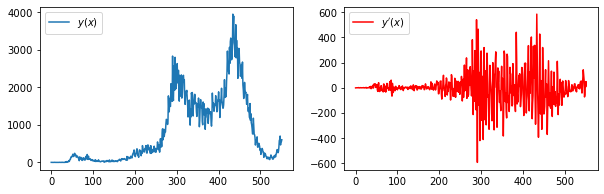

In [53]:
x,y = np.loadtxt('coviddata.txt')
dydx = np.gradient(y,x)

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(x,y, label="$y(x)$")
ax[1].plot(x,dydx, label="$y\'(x)$", color="r")
[a.legend() for a in ax]
plt.show();

Smooth the data by convolving it with a rectangle

In [54]:
filt = np.ones(15)/15
filt

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [55]:
y_smooth = np.convolve(y, filt, mode="valid")
dysdx = np.gradient(y_smooth, x[7:-7])

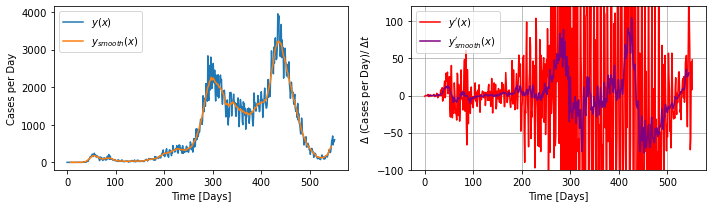

In [57]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(x,y, label='$y(x)$')
ax[0].plot(x[7:-7], y_smooth, label=r"$y_{{smooth}}(x)$")
ax[1].plot(x,dydx,label='$y\'(x)$', color='r')
ax[1].plot(x[7:-7],dysdx,label='$y_{smooth}\'(x)$', color="purple")
ax[1].set_ylim(-100,120)
ax[1].grid()
[a.legend() for a in ax]
[a.set_xlabel('Time [Days]') for a in ax]
ax[0].set_ylabel('Cases per Day')
ax[1].set_ylabel('$\Delta$ (Cases per Day)/ $\Delta t$')
fig.tight_layout()
plt.show()

---

# Integration

---

Analytic solutions

**Q1:** Find $\int x^2 dx$

In [15]:
x = smp.symbols('x', real=True)

y = x**2

In [16]:
smp.integrate(y, x)

x**3/3

**Q2:** Find $\int sin^3(x)e^{-5x}dx$

In [17]:
f = smp.sin(x)**3 * smp.exp(-5*x)

smp.integrate(f, x)

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

**Q3:** Find $\int cos(bx)e^{-ax}dx$

In [18]:
a,b = smp.symbols('a,b', real=True, positive=True)

fx = smp.cos(b*x)*smp.exp(-a*x)

In [19]:
smp.integrate(fx,x)

-a*cos(b*x)/(a**2*exp(a*x) + b**2*exp(a*x)) + b*sin(b*x)/(a**2*exp(a*x) + b**2*exp(a*x))

In [20]:
smp.integrate(fx,x).simplify()

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

**Q4:** Find $\int \frac{(1 +\sqrt{x})^{1/3}}{\sqrt x}dx$

In [21]:
y = (1 + smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x)

**NB:** When you have power of fraction, use `smp.Rational`

In [22]:
y

(sqrt(x) + 1)**(1/3)/sqrt(x)

In [23]:
smp.integrate(y, x)

3*sqrt(x)*(sqrt(x) + 1)**(1/3)/2 + 3*(sqrt(x) + 1)**(1/3)/2

In [24]:
smp.integrate(y, x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

**Q5:** Find $\int_{0}^{\ln(4)} \frac{e^x}{\sqrt {e^{2x}+9}}dx$

In [25]:
y = smp.exp(x)/ smp.sqrt(smp.exp(2*x) + 9)

In [26]:
y

exp(x)/sqrt(exp(2*x) + 9)

In [27]:
smp.integrate(y, (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

In [28]:
smp.integrate(y, (x, 0, smp.log(4))).evalf()

0.771162138430851

**Q6:** Find $\int_{0}^{\infty} \frac{16 tan^{-1} (x)}{1 + x^2} dx$

In [29]:
f = 16*smp.atan(x) / (1 + x**2)

In [30]:
f

16*atan(x)/(x**2 + 1)

In [31]:
smp.integrate(f, (x,0,smp.oo))

2*pi**2

**NB:** `oo` represents infinity in sympy

## "Unsolvable" Integrals

**Example:** Find $\int\limits_{1}^{2} e^{-sin(x)} dx$

**NB:** It is unsolvable using sympy instead use scipy's `quad` function to integrate numerically

In [32]:
import numpy as np
from scipy.integrate import quad

In [33]:
f = lambda x : np.exp(-np.sin(x))

In [34]:
quad(f, 1, 2)

# gives (ans, estimated error)

(0.3845918142796868, 4.2698268729567035e-15)

In [35]:
quad(f, 1, 2)[0]

0.3845918142796868

**Example:** Find $\int_{0}^{2\pi} \frac{1}{(a - cos(x))^2 + (b-sin(x))^2} dx$